In [57]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

In [2]:
conn = sqlite3.connect('database.db')

In [3]:
cursor = conn.cursor()

In [42]:
cursor.execute('''SELECT Buy.EmitenBuy, Buy.BuyVal, Sell.SellVal, Buy.BuyVal - Sell.SellVal AS Balance, ROUND(Buy.BuyVal / Sell.SellVal,2) AS Ratio, harga_closing.Close_Price, harga_wajar.Harga_Wajar, Buy.unix_date FROM Buy INNER JOIN Sell ON Buy.EmitenBuy = Sell.EmitenSell AND Buy.unix_date = Sell.unix_date INNER JOIN harga_closing ON Buy.EmitenBuy = harga_closing.Emiten AND Buy.unix_date = harga_closing.unix_date INNER JOIN harga_wajar ON Buy.EmitenBuy = harga_wajar.Emiten WHERE Buy.unix_date = Sell.unix_date AND Buy.EmitenBuy= 'BBCA' AND Sell.EmitenSell = 'BBCA' ORDER BY Buy.unix_date ASC ''')
rows = cursor.fetchall()
for row in rows:
    print(row)

('BBCA', 1009958692500.0, 466333232500.0, 543625460000.0, 2.17, 9700.0, 9846.0, '2024-02-01')
('BBCA', 814539137500.0, 717830270000.0, 96708867500.0, 1.13, 9700.0, 9846.0, '2024-02-02')
('BBCA', 272958967500.0, 401311917500.0, -128352950000.0, 0.68, 9575.0, 9846.0, '2024-02-05')
('BBCA', 745183597500.0, 617138390000.0, 128045207500.0, 1.21, 9625.0, 9846.0, '2024-02-06')
('BBCA', 837976960000.0, 572215217500.0, 265761742500.0, 1.46, 9700.0, 9846.0, '2024-02-07')
('BBCA', 643398697500.0, 355466840000.0, 287931857500.0, 1.81, 9800.0, 9846.0, '2024-02-12')
('BBCA', 447574395000.0, 265565390000.0, 182009005000.0, 1.69, 9725.0, 9846.0, '2024-02-13')
('BBCA', 1372505422500.0, 905991650000.0, 466513772500.0, 1.51, 9850.0, 9846.0, '2024-02-15')
('BBCA', 1260744062500.0, 790144112500.0, 470599950000.0, 1.6, 9950.0, 9846.0, '2024-02-16')
('BBCA', 387238922500.0, 295494992500.0, 91743930000.0, 1.31, 9875.0, 9846.0, '2024-02-19')
('BBCA', 529706382500.0, 373581920000.0, 156124462500.0, 1.42, 10025.

In [6]:
cursor.execute('''SELECT * FROM harga_closing WHERE unix_date = '2024-03-20' ''')
rows = cursor.fetchall()
for row in rows:
    print(row)

(27037, 'AALI', 6875.0, '2024-03-20')
(27038, 'ABBA', 50.0, '2024-03-20')
(27039, 'ABDA', 5000.0, '2024-03-20')
(27040, 'ABMM', 3660.0, '2024-03-20')
(27041, 'ACES', 930.0, '2024-03-20')
(27042, 'ACRO', 113.0, '2024-03-20')
(27043, 'ACST', 137.0, '2024-03-20')
(27044, 'ADCP', 50.0, '2024-03-20')
(27045, 'ADES', 9700.0, '2024-03-20')
(27046, 'ADHI', 302.0, '2024-03-20')
(27047, 'ADMF', 13675.0, '2024-03-20')
(27048, 'ADMG', 133.0, '2024-03-20')
(27049, 'ADMR', 1350.0, '2024-03-20')
(27050, 'ADRO', 2650.0, '2024-03-20')
(27051, 'AEGS', 74.0, '2024-03-20')
(27052, 'AGAR', 90.0, '2024-03-20')
(27053, 'AGII', 1520.0, '2024-03-20')
(27054, 'AGRO', 272.0, '2024-03-20')
(27055, 'AGRS', 75.0, '2024-03-20')
(27056, 'AHAP', 128.0, '2024-03-20')
(27057, 'AIMS', 515.0, '2024-03-20')
(27058, 'AISA', 130.0, '2024-03-20')
(27059, 'AKKU', 50.0, '2024-03-20')
(27060, 'AKPI', 685.0, '2024-03-20')
(27061, 'AKRA', 1795.0, '2024-03-20')
(27062, 'AKSI', 135.0, '2024-03-20')
(27063, 'ALDO', 785.0, '2024-03-20

In [61]:
# x_values = [row[7] for row in rows]
dates = [datetime.strptime(date, '%Y-%m-%d') for date in x_values]
# y_values = [row[4] for row in rows]

In [66]:
x_values

['2024-02-01',
 '2024-02-02',
 '2024-02-05',
 '2024-02-06',
 '2024-02-07',
 '2024-02-12',
 '2024-02-13',
 '2024-02-15',
 '2024-02-16',
 '2024-02-19',
 '2024-02-20',
 '2024-02-21',
 '2024-02-22',
 '2024-02-23',
 '2024-02-26',
 '2024-02-27',
 '2024-02-28',
 '2024-02-29',
 '2024-03-01',
 '2024-03-04',
 '2024-03-05',
 '2024-03-06',
 '2024-03-07',
 '2024-03-08',
 '2024-03-13',
 '2024-03-14',
 '2024-03-15',
 '2024-03-18',
 '2024-03-19',
 '2024-03-20']

In [67]:
y_values

[2.17,
 1.13,
 0.68,
 1.21,
 1.46,
 1.81,
 1.69,
 1.51,
 1.6,
 1.31,
 1.42,
 0.7,
 0.82,
 0.8,
 0.56,
 0.92,
 1.56,
 0.77,
 0.54,
 0.63,
 0.93,
 1.26,
 1.66,
 1.49,
 0.75,
 2.12,
 0.88,
 1.17,
 0.86,
 0.59]

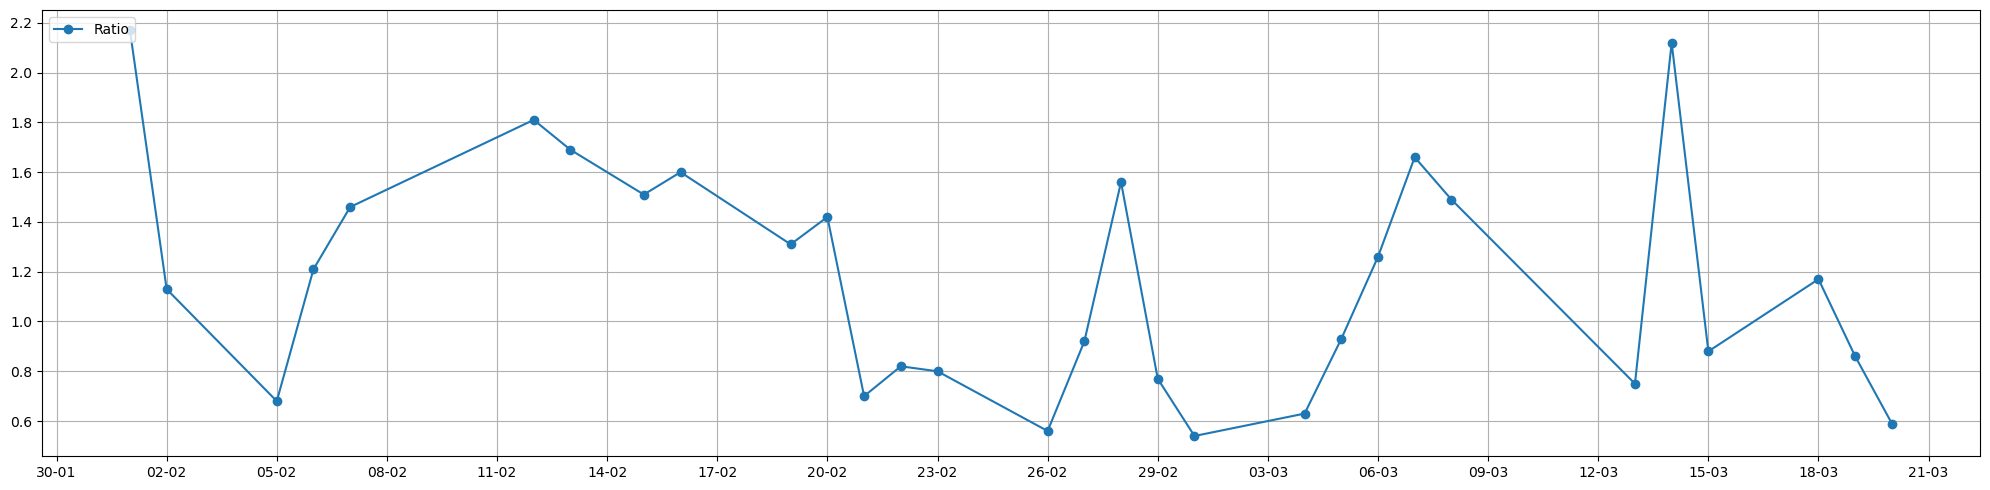

In [80]:
# y_1 = df['BVal']
# y_2 = df['SVal']
# # y_3 = df['Ratio']
# # y_4 = df['Balance']
# x = df['Date']
plt.plot(dates,y_values,marker='o')
# plt.plot(x,y_2,marker='o')
# plt.plot(x,y_3,marker='o')
# plt.plot(x,y_4,marker='o')
plt.grid()
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True
legend_drawn_flag = True
plt.legend(['Ratio'], loc=2, frameon=legend_drawn_flag)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.show()

In [74]:
buy_values = [row[1] for row in rows]
sell_values = [row[2] for row in rows]

In [84]:
y_values

[2.17,
 1.13,
 0.68,
 1.21,
 1.46,
 1.81,
 1.69,
 1.51,
 1.6,
 1.31,
 1.42,
 0.7,
 0.82,
 0.8,
 0.56,
 0.92,
 1.56,
 0.77,
 0.54,
 0.63,
 0.93,
 1.26,
 1.66,
 1.49,
 0.75,
 2.12,
 0.88,
 1.17,
 0.86,
 0.59]

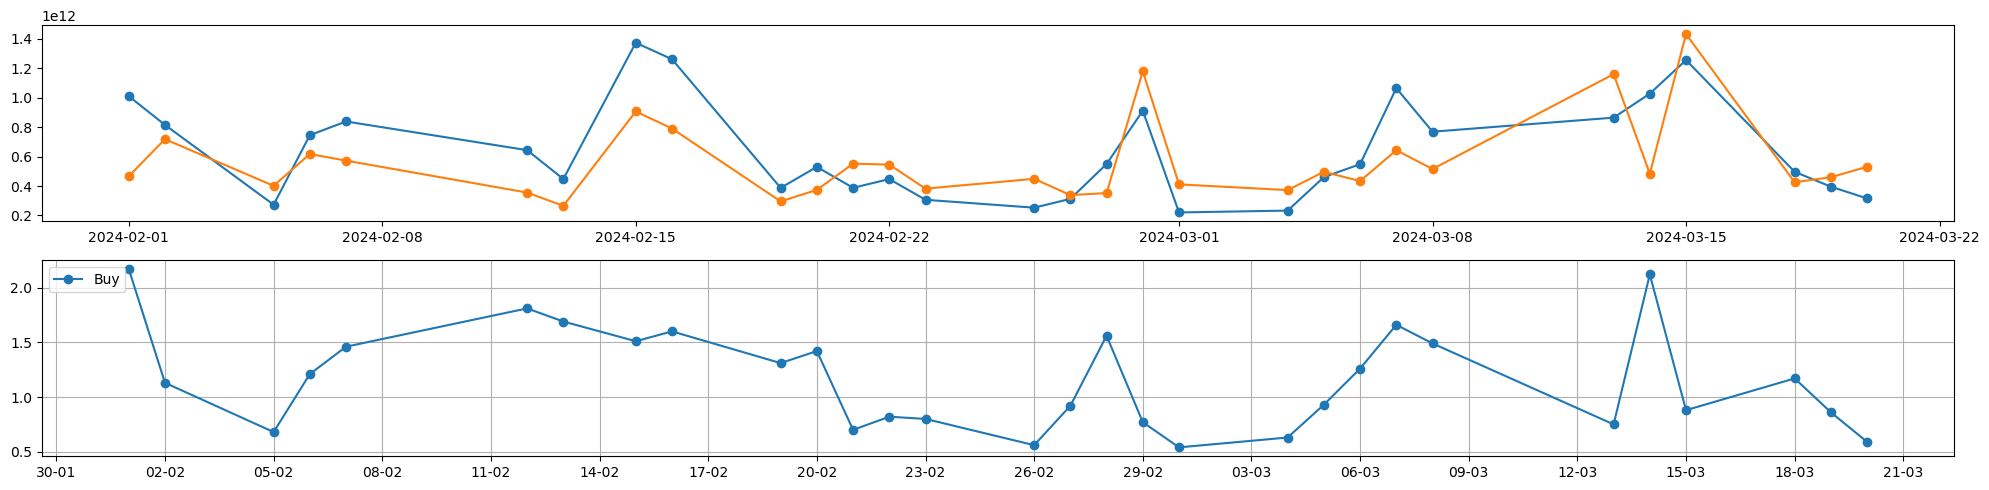

In [92]:
fig, axs = plt.subplots(2, 1, figsize=(20, 5))
plt.grid()
axs[0].plot(dates,buy_values,marker='o')
axs[0].plot(dates,sell_values,marker='o')
axs[1].plot(dates,y_values,marker='o')
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True
legend_drawn_flag = True
plt.legend(['Buy', 'Sell', 'Ratio'], loc=2, frameon=legend_drawn_flag)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.tight_layout()
plt.show()

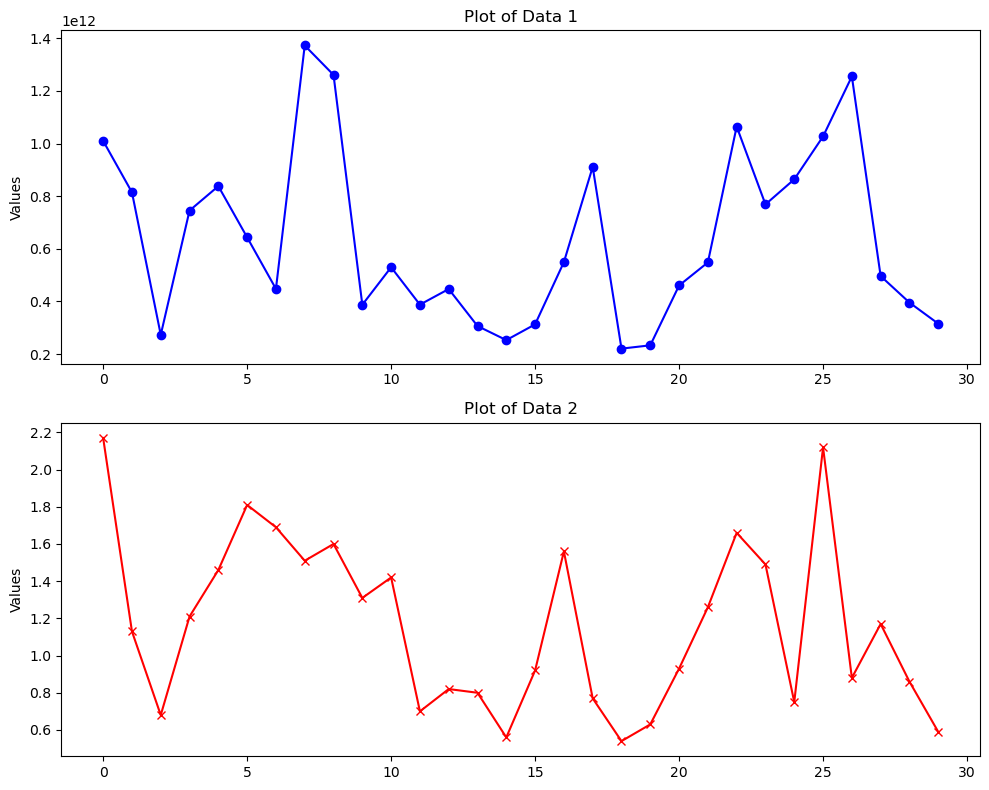

In [85]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot data1
axs[0].plot(buy_values, marker='o', color='b')
axs[0].set_title('Plot of Data 1')
axs[0].set_ylabel('Values')

# Plot data2
axs[1].plot(y_values, marker='x', color='r')
axs[1].set_title('Plot of Data 2')
axs[1].set_ylabel('Values')

# Show the plots
plt.tight_layout()
plt.show()

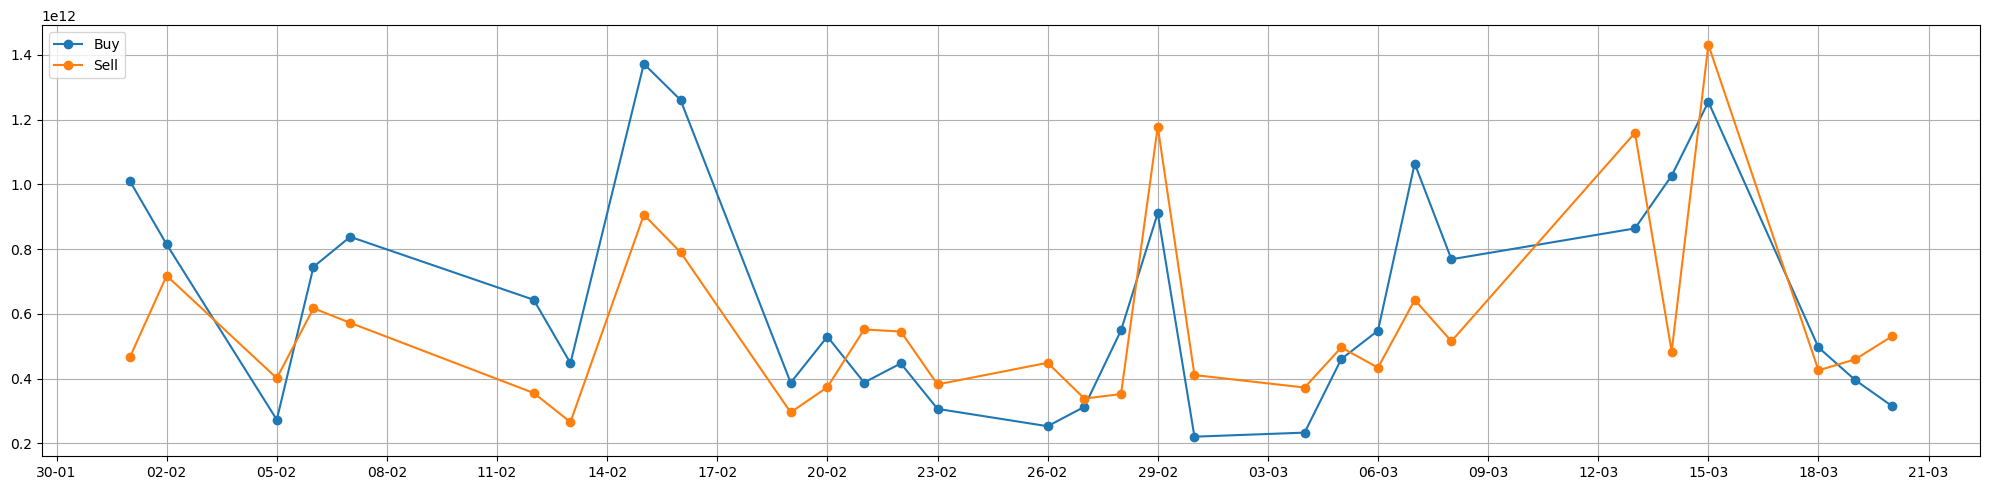

In [94]:
plt.plot(dates,buy_values,marker='o')
plt.plot(dates,sell_values,marker='o')
# plt.plot(dates,y_values,marker='o')
plt.grid()
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True
legend_drawn_flag = True
plt.legend(['Buy', 'Sell', 'Ratio'], loc=2, frameon=legend_drawn_flag)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.tight_layout()
plt.show()

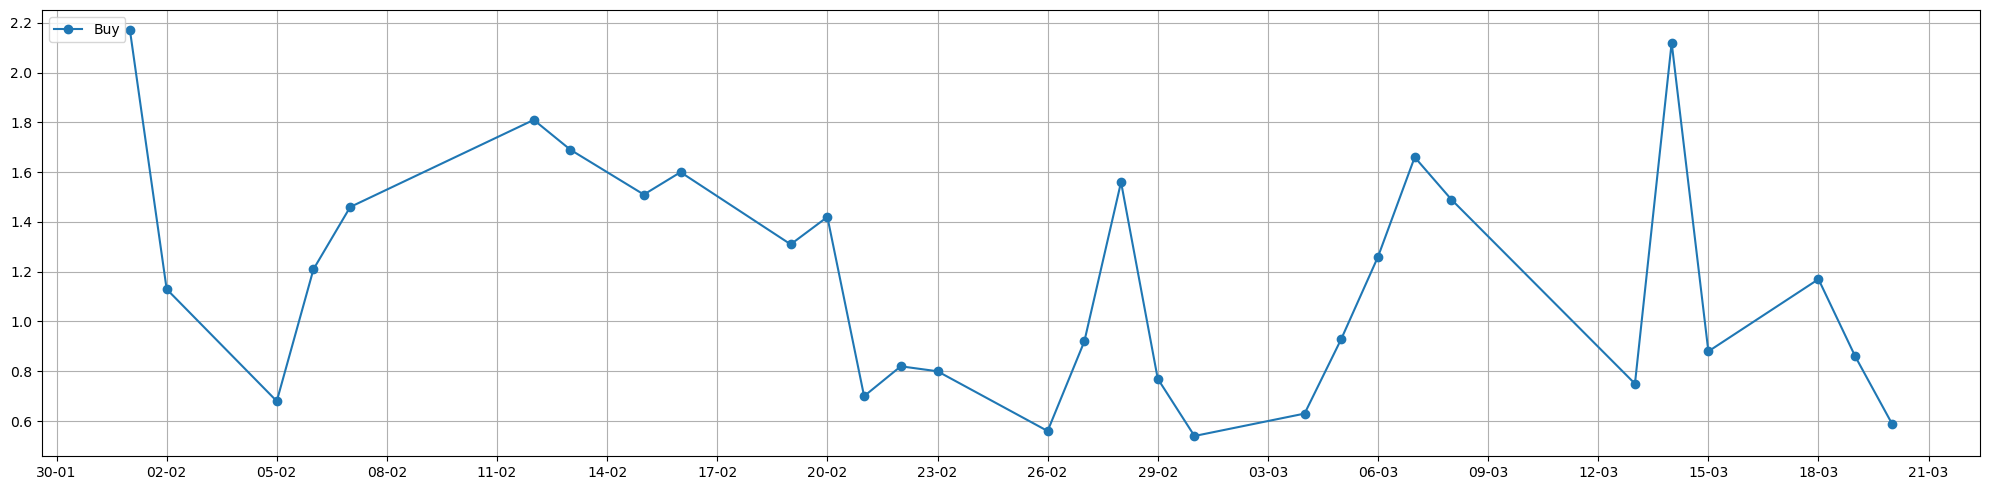

In [95]:
plt.plot(dates,y_values,marker='o')
plt.grid()
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True
legend_drawn_flag = True
plt.legend(['Buy', 'Sell', 'Ratio'], loc=2, frameon=legend_drawn_flag)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.tight_layout()
plt.show()

In [99]:
[row[0] for row in rows][0]

'BBCA'